# Pandas I

### 0. Připravte si data

1. Stáhněte si soubor https://datahub.io/sports-data/english-premier-league/r/season-1819.csv
1. Umístěte jej do složky data

### 1. Načtěte data set `season-1819_csv.csv` a provedte následující úpravy:

1. načtěte pouze prvních 17 sloupců
1. zahoďte sloupce Div, FTR a HTR
1. sloupec Date převeďte na datetime
1. přejmenujte sloupce:
    - FTHG: FullTimeHomeGoals
    - FTAG: FullTimeAwayGoals
    - HTHG: HalfTimeHomeGoals
    - HTAG: HalfTimeAwayGoals
    - HS: HomeShots
    - AS: AwayShots
    - HST: HomeShotsTarget
    - AST: AwayShotsTarget
    - HF: HomeFauls
    - AF: AwayFauls

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

In [3]:
d = pd.read_csv("https://datahub.io/sports-data/english-premier-league/r/season-1819.csv", usecols=range(17))
d.info()
d = d.rename(columns={
    "FTHG": "FullTimeHomeGoals",
    "FTAG": "FullTimeAwayGoals", 
    "HTHG": "HalfTimeHomeGoals", 
    "HTAG": "HalfTimeAwayGoals", 
    "HS":"HomeShots", 
    "AS": "AwayShots", 
    "HST": "HomeShotsTarget", 
    "AST": "AwayShotsTarget", 
    "HF": "HomeFauls", 
    "AF": "AwayFauls" 
    })

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Div       380 non-null    object
 1   Date      380 non-null    object
 2   HomeTeam  380 non-null    object
 3   AwayTeam  380 non-null    object
 4   FTHG      380 non-null    int64 
 5   FTAG      380 non-null    int64 
 6   FTR       380 non-null    object
 7   HTHG      380 non-null    int64 
 8   HTAG      380 non-null    int64 
 9   HTR       380 non-null    object
 10  Referee   380 non-null    object
 11  HS        380 non-null    int64 
 12  AS        380 non-null    int64 
 13  HST       380 non-null    int64 
 14  AST       380 non-null    int64 
 15  HF        380 non-null    int64 
 16  AF        380 non-null    int64 
dtypes: int64(10), object(7)
memory usage: 50.6+ KB


In [4]:
# d = d.iloc[:, :17]
df = d.drop(["Div", "FTR", "HTR"], axis=1)

df['Date']= pd.to_datetime(df['Date'], format='%d/%m/%Y')
df.head()

,Date,HomeTeam,AwayTeam,FullTimeHomeGoals,FullTimeAwayGoals,HalfTimeHomeGoals,HalfTimeAwayGoals,Referee,HomeShots,AwayShots,HomeShotsTarget,AwayShotsTarget,HomeFauls,AwayFauls
0,2018-08-10,Man United,Leicester,2,1,1,0,A Marriner,8,13,6,4,11,8
1,2018-08-11,Bournemouth,Cardiff,2,0,1,0,K Friend,12,10,4,1,11,9
2,2018-08-11,Fulham,Crystal Palace,0,2,0,1,M Dean,15,10,6,9,9,11
3,2018-08-11,Huddersfield,Chelsea,0,3,0,2,C Kavanagh,6,13,1,4,9,8
4,2018-08-11,Newcastle,Tottenham,1,2,1,2,M Atkinson,15,15,2,5,11,12


### 2. Zjistěte jaké datové typy mají všechny sloupečky, zda data set obsahuje nějaké NaN hodnoty a jaké jsou základní statistiky číselných sloupců.

In [14]:
df.info()
df.isnull().values.any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               380 non-null    datetime64[ns]
 1   HomeTeam           380 non-null    object        
 2   AwayTeam           380 non-null    object        
 3   FullTimeHomeGoals  380 non-null    int64         
 4   FullTimeAwayGoals  380 non-null    int64         
 5   HalfTimeHomeGoals  380 non-null    int64         
 6   HalfTimeAwayGoals  380 non-null    int64         
 7   Referee            380 non-null    object        
 8   HomeShots          380 non-null    int64         
 9   AwayShots          380 non-null    int64         
 10  HomeShotsTarget    380 non-null    int64         
 11  AwayShotsTarget    380 non-null    int64         
 12  HomeFauls          380 non-null    int64         
 13  AwayFauls          380 non-null    int64         
dtypes: datetim

False

In [5]:
df.describe()

,FullTimeHomeGoals,FullTimeAwayGoals,HalfTimeHomeGoals,HalfTimeAwayGoals,HomeShots,AwayShots,HomeShotsTarget,AwayShotsTarget,HomeFauls,AwayFauls
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.568421,1.252632,0.678947,0.573684,14.134211,11.144737,4.778947,3.928947,10.152632,10.305263
std,1.312836,1.180031,0.860802,0.766958,5.855371,4.654002,2.677686,2.283982,3.293532,3.503707
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,3.000000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,8.000000,3.000000,2.000000,8.000000,8.000000
50%,1.000000,1.000000,0.000000,0.000000,14.000000,11.000000,5.000000,4.000000,10.000000,10.000000
75%,2.000000,2.000000,1.000000,1.000000,18.000000,14.000000,6.000000,5.250000,12.000000,13.000000
max,6.000000,6.000000,4.000000,3.000000,36.000000,25.000000,14.000000,12.000000,23.000000,21.000000


### 3. Zjistěte kolik různých týmů hraje anglickou ligu? Jaké týmy to jsou?

In [6]:
import numpy as np

joined = pd.concat([df["HomeTeam"], df["AwayTeam"]])
teams = pd.unique(joined)
display(teams)
len(teams)

array(['Man United', 'Bournemouth', 'Fulham', 'Huddersfield', 'Newcastle',
       'Watford', 'Wolves', 'Arsenal', 'Liverpool', 'Southampton',
       'Cardiff', 'Chelsea', 'Everton', 'Leicester', 'Tottenham',
       'West Ham', 'Brighton', 'Burnley', 'Man City', 'Crystal Palace'],
      dtype=object)

20

### 4. Přidejte sloupečky `HomeShotAccuracy` a `AwayShotAccuracy`, které říkají jaké procento střeleckých pokusů (Shots) nakonec mířilo na bránu (ShotsTarget). Vizualizujte rozdělení hodnot obou sloupců.

In [9]:
plt.rcParams['figure.figsize'] = (24, 6)  # redefine the default size of the plots
plt.style.use('ggplot')  # redefine default color scheme



In [10]:
matches = df.copy()

In [11]:

matches["HomeShotAccuracy"] = matches["HomeShotsTarget"] /  matches["HomeShots"]
matches["AwayShotAccuracy"] = matches["AwayShotsTarget"] /  matches["AwayShots"]
matches.head()

,Date,HomeTeam,AwayTeam,FullTimeHomeGoals,FullTimeAwayGoals,HalfTimeHomeGoals,HalfTimeAwayGoals,Referee,HomeShots,AwayShots,HomeShotsTarget,AwayShotsTarget,HomeFauls,AwayFauls,HomeShotAccuracy,AwayShotAccuracy
0,2018-08-10,Man United,Leicester,2,1,1,0,A Marriner,8,13,6,4,11,8,0.750000,0.307692
1,2018-08-11,Bournemouth,Cardiff,2,0,1,0,K Friend,12,10,4,1,11,9,0.333333,0.100000
2,2018-08-11,Fulham,Crystal Palace,0,2,0,1,M Dean,15,10,6,9,9,11,0.400000,0.900000
3,2018-08-11,Huddersfield,Chelsea,0,3,0,2,C Kavanagh,6,13,1,4,9,8,0.166667,0.307692
4,2018-08-11,Newcastle,Tottenham,1,2,1,2,M Atkinson,15,15,2,5,11,12,0.133333,0.333333


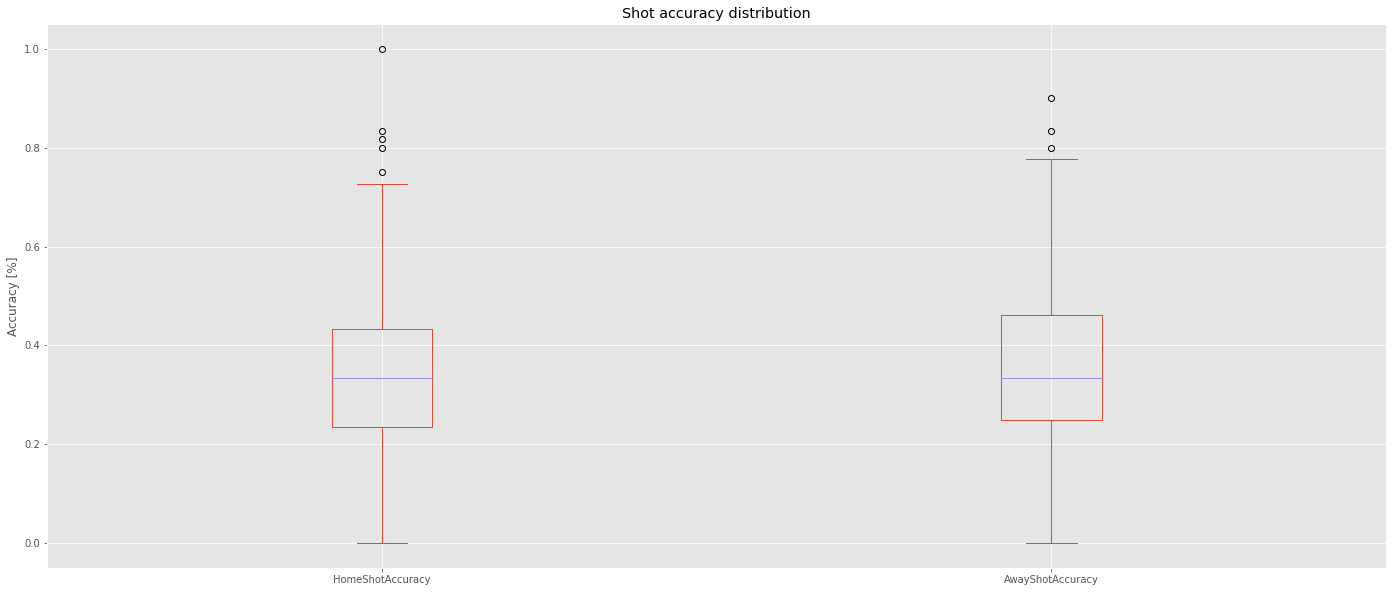

In [12]:
matches[['HomeShotAccuracy', 'AwayShotAccuracy']].plot.box(title='Shot accuracy distribution', figsize=(24, 10));
plt.ylabel('Accuracy [%]');

### 5. Vytvořte sloupeček `FullTimeWinner`, který obsahuje:

- `H`, pokud zvítězil `HomeTeam`
- `A`, pokud zvítězil `AwayTeam`
- `D`, pokud zápas skončil remízou

**Poznámka: Zatím neznáme apply, ale známe loc. Použijte tedy šikovně loc.** 

In [17]:
matches["FullTimeWinner"] = np.where(df['HomeShotsTarget'] > df['AwayShotsTarget'], "H", "A")
matches["FullTimeWinner"] = np.where(df['HomeShotsTarget'] == df['AwayShotsTarget'], "D", matches["FullTimeWinner"])

sloupec_bez_null = matches["FullTimeWinner"].filter(is_null)
sloupec_bez_null.mean()

matches[matches["FullTimeWinner"] == "H"]
matches.to_csv("ahoj.csv")


,Date,HomeTeam,AwayTeam,FullTimeHomeGoals,FullTimeAwayGoals,HalfTimeHomeGoals,HalfTimeAwayGoals,Referee,HomeShots,AwayShots,HomeShotsTarget,AwayShotsTarget,HomeFauls,AwayFauls,HomeShotAccuracy,AwayShotAccuracy,FullTimeWinner
0,2018-08-10,Man United,Leicester,2,1,1,0,A Marriner,8,13,6,4,11,8,0.750000,0.307692,H
1,2018-08-11,Bournemouth,Cardiff,2,0,1,0,K Friend,12,10,4,1,11,9,0.333333,0.100000,H
5,2018-08-11,Watford,Brighton,2,0,1,0,J Moss,19,6,5,0,10,16,0.263158,0.000000,H
8,2018-08-12,Liverpool,West Ham,4,0,2,0,A Taylor,18,5,8,2,14,9,0.444444,0.400000,H
11,2018-08-18,Chelsea,Arsenal,3,2,2,2,M Atkinson,24,15,11,6,12,9,0.458333,0.400000,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,2019-05-05,Arsenal,Brighton,1,1,1,0,A Taylor,20,11,8,5,9,14,0.400000,0.454545,H
367,2019-05-05,Chelsea,Watford,3,0,0,0,P Tierney,19,15,9,3,6,12,0.473684,0.200000,H
369,2019-05-06,Man City,Leicester,1,0,0,0,M Dean,19,7,5,2,12,5,0.263158,0.285714,H
375,2019-05-12,Liverpool,Wolves,2,0,1,0,M Atkinson,13,7,5,2,3,11,0.384615,0.285714,H


### 6. Řekněme, že nás zajímá tým West Ham. Zjistětě, kolik průměrně vsítí gólů v domácích zápasech, které vyhraje a kolik v domácích zápasech, které prohraje.

In [28]:
# TODO: Implement your solution.

### 7. Jaký je median faulů, střel na branku a vstřelených gólů West Ham pro předchozích pět domácích zápasů? Jak se tyto statistiky vyvíjí v čase? Vizualizujte je.

In [29]:
# TODO: Implement your solution.

### 8. Je domácí prostředí výhodou?

**Poznámka: Součástí řešení je zamyslet se, jakou formou tuto otázku zodpovědět a jaké předpoklady si mohu dovolit udělat.** 

In [30]:
# TODO: Implement your solution.

### 9. Kolik který rozhodčí odpískal za sezónu průměrně faulů za zápas? Seřaďte je od těch nejpřísnějších.

In [31]:
# TODO: Implement your solution.

### 10. (BONUS) Budu víc vyhrávat, když budu víc faulovat?

In [32]:
# TODO: Implement your solution.